# Bottom 10 Spenders

#### Load the data and necessary libraries

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma.csv')

## Exploring Year Range: 2005 to 2014

### Bottom 10 Lowest Spending Countries (Per Capita)

This table ranks the countries by their average spending per capita in USD, starting from the lowest.

| Rank | Country Code | Country Name     | Average Spending Per Capita ($ USD) |
|:----:|:------------:|:----------------:|:-----------------------------------:|
| 1    | LVA          | Latvia           | 269.196400                          |
| 2    | EST          | Estonia          | 269.575900                          |
| 3    | ISR          | Israel           | 274.791375                          |
| 4    | MEX          | Mexico           | 277.979500                          |
| 5    | POL          | Poland           | 304.320700                          |
| 6    | DNK          | Denmark          | 324.135200                          |
| 7    | LTU          | Lithuania        | 373.809400                          |
| 8    | CZE          | Czech Republic   | 395.318600                          |
| 9    | NOR          | Norway           | 412.787900                          |
| 10   | NLD          | Netherlands      | 428.909700                          |


#### Supporting Python Code:

In [2]:
# Filter the DataFrame to include only the years 2005 to 2014
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2014)]

# Exclude the dropped countries
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(['GBR', 'NZL', 'TUR', 'RUS'])]

# Identify the Bottom 10 highest spending countries (Per Capita)
bottom_10_per_cap = df_filtered.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=True).head(10)

# Display the results
print("Bottom 10 Lowest Spending Countries (Excluding GBR and NZL):")
print(bottom_10_per_cap)


Bottom 10 Lowest Spending Countries (Excluding GBR and NZL):
LOCATION
LVA    269.196400
EST    269.575900
ISR    274.791375
MEX    277.979500
POL    304.320700
DNK    324.135200
LTU    373.809400
CZE    395.318600
NOR    412.787900
NLD    428.909700
Name: USD_CAP, dtype: float64


## Data Visualization using Python

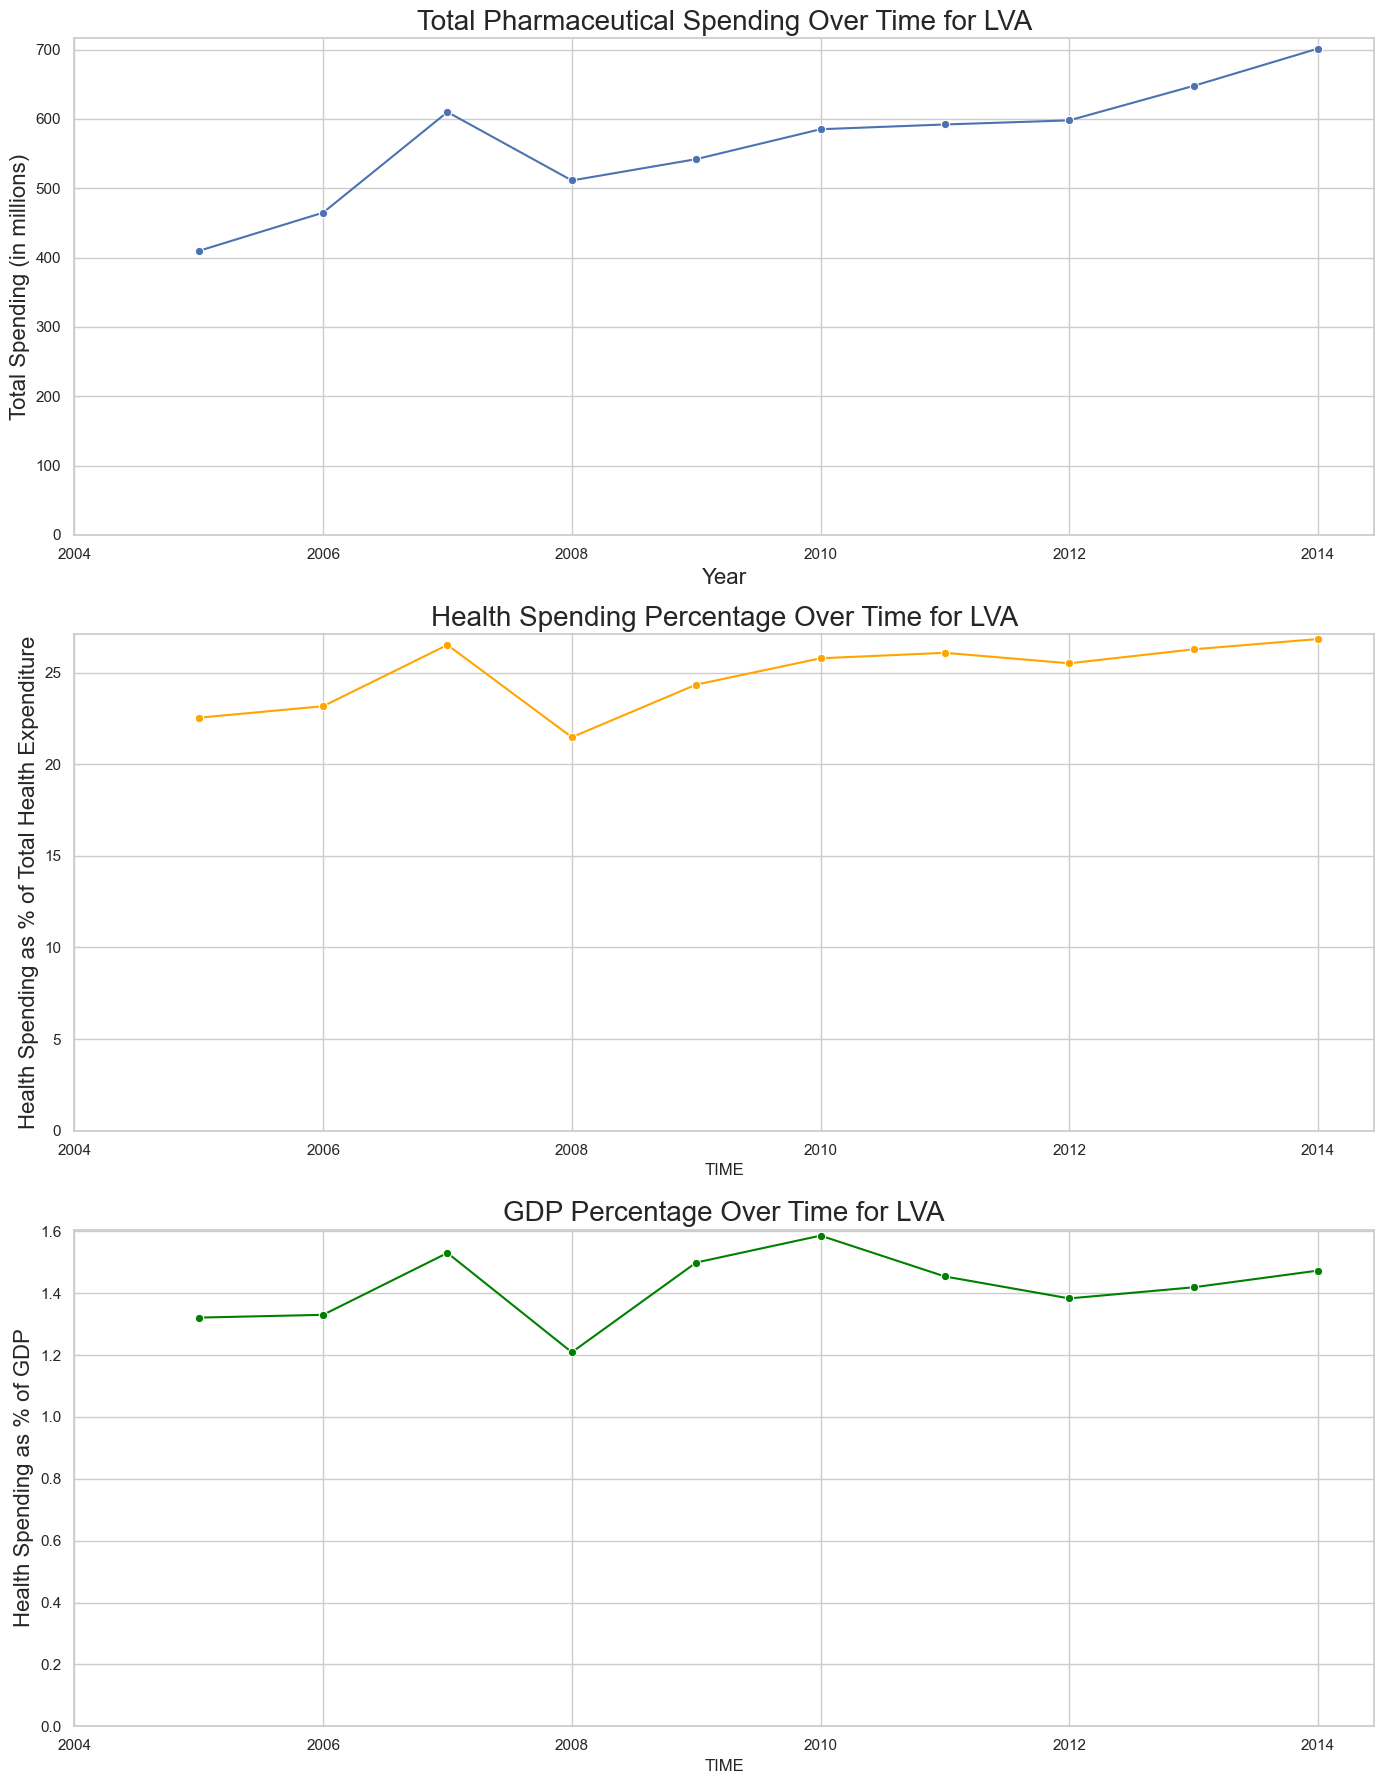

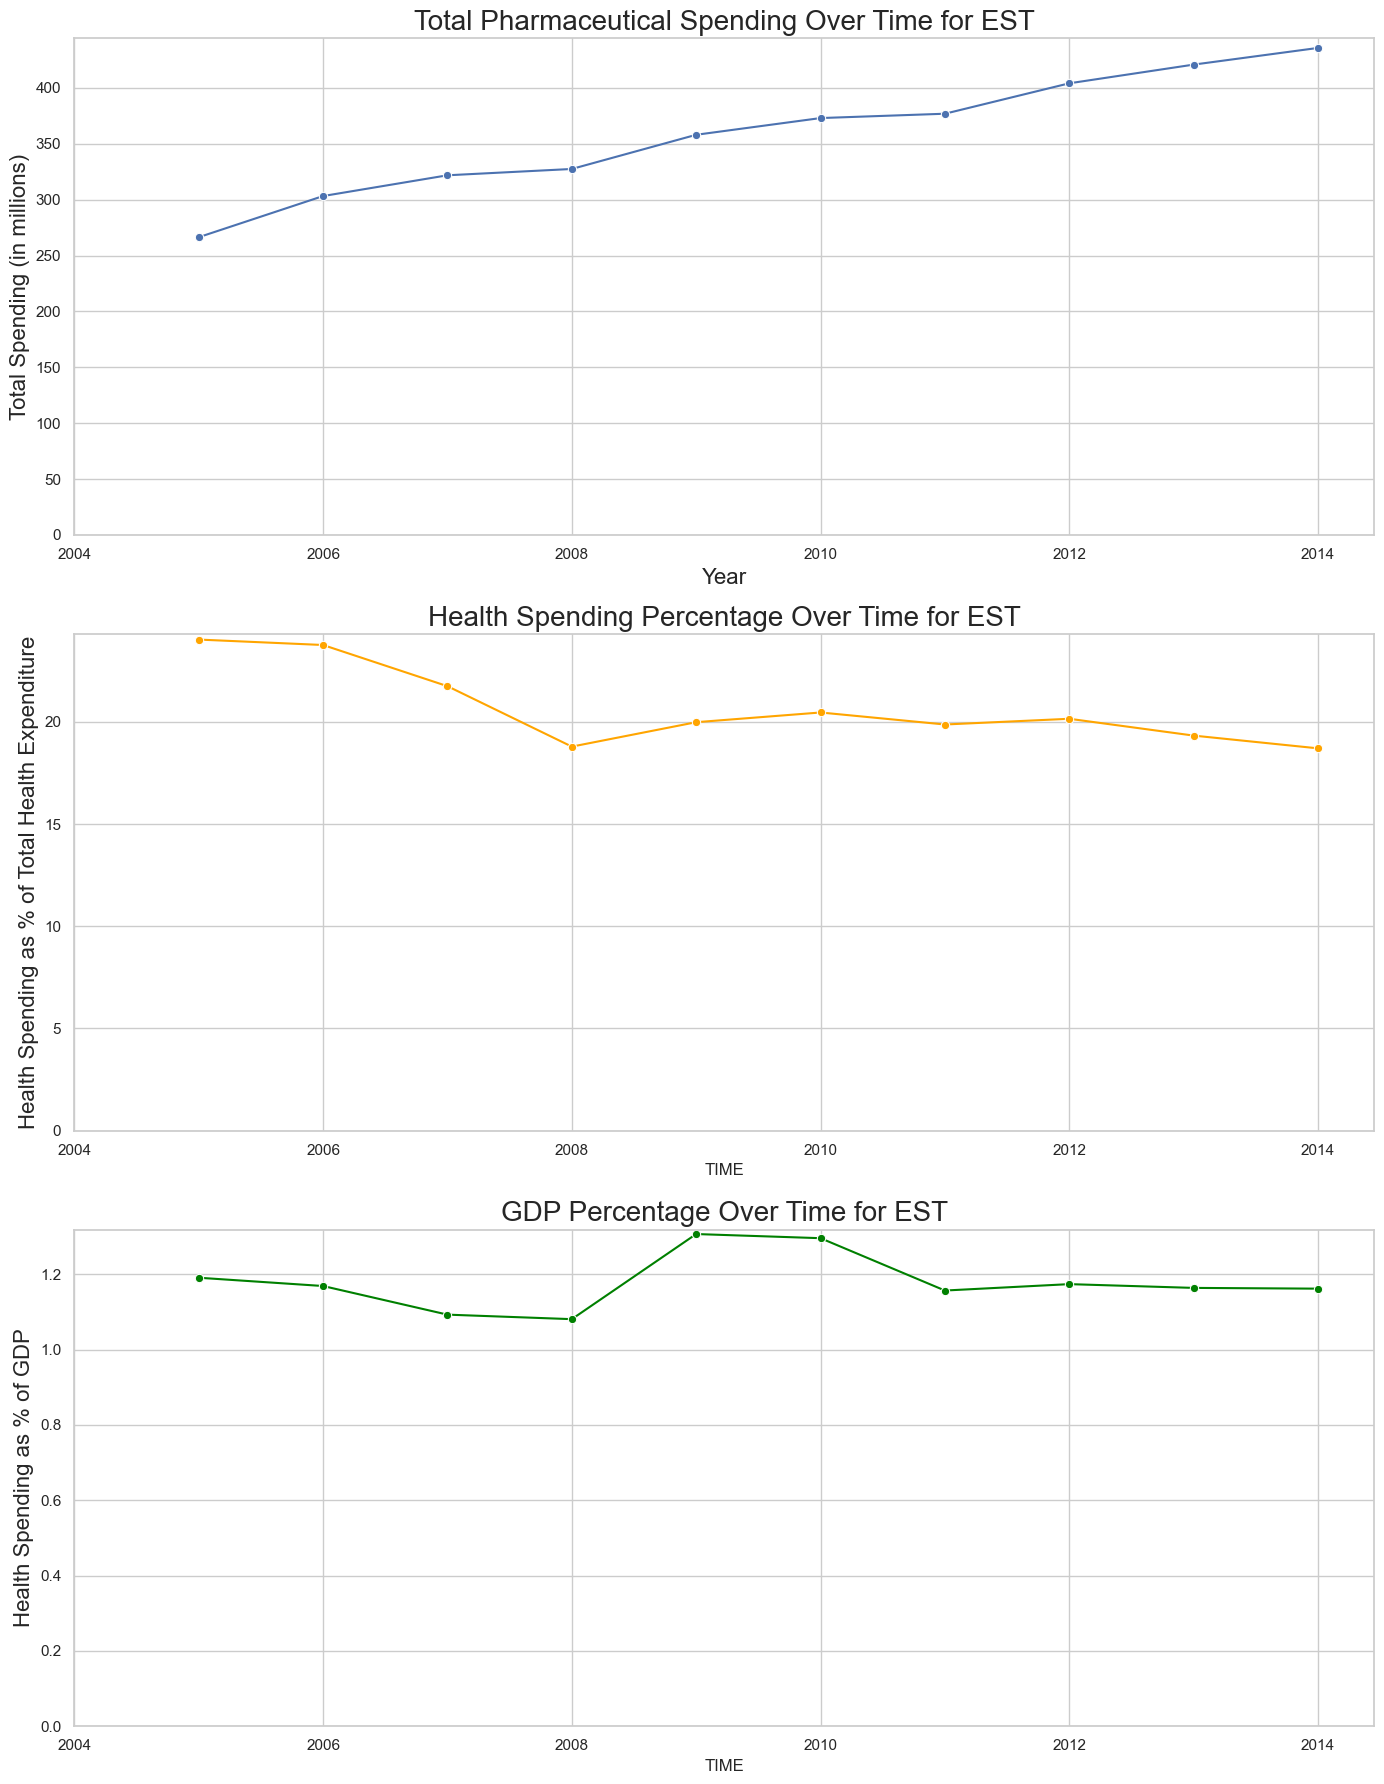

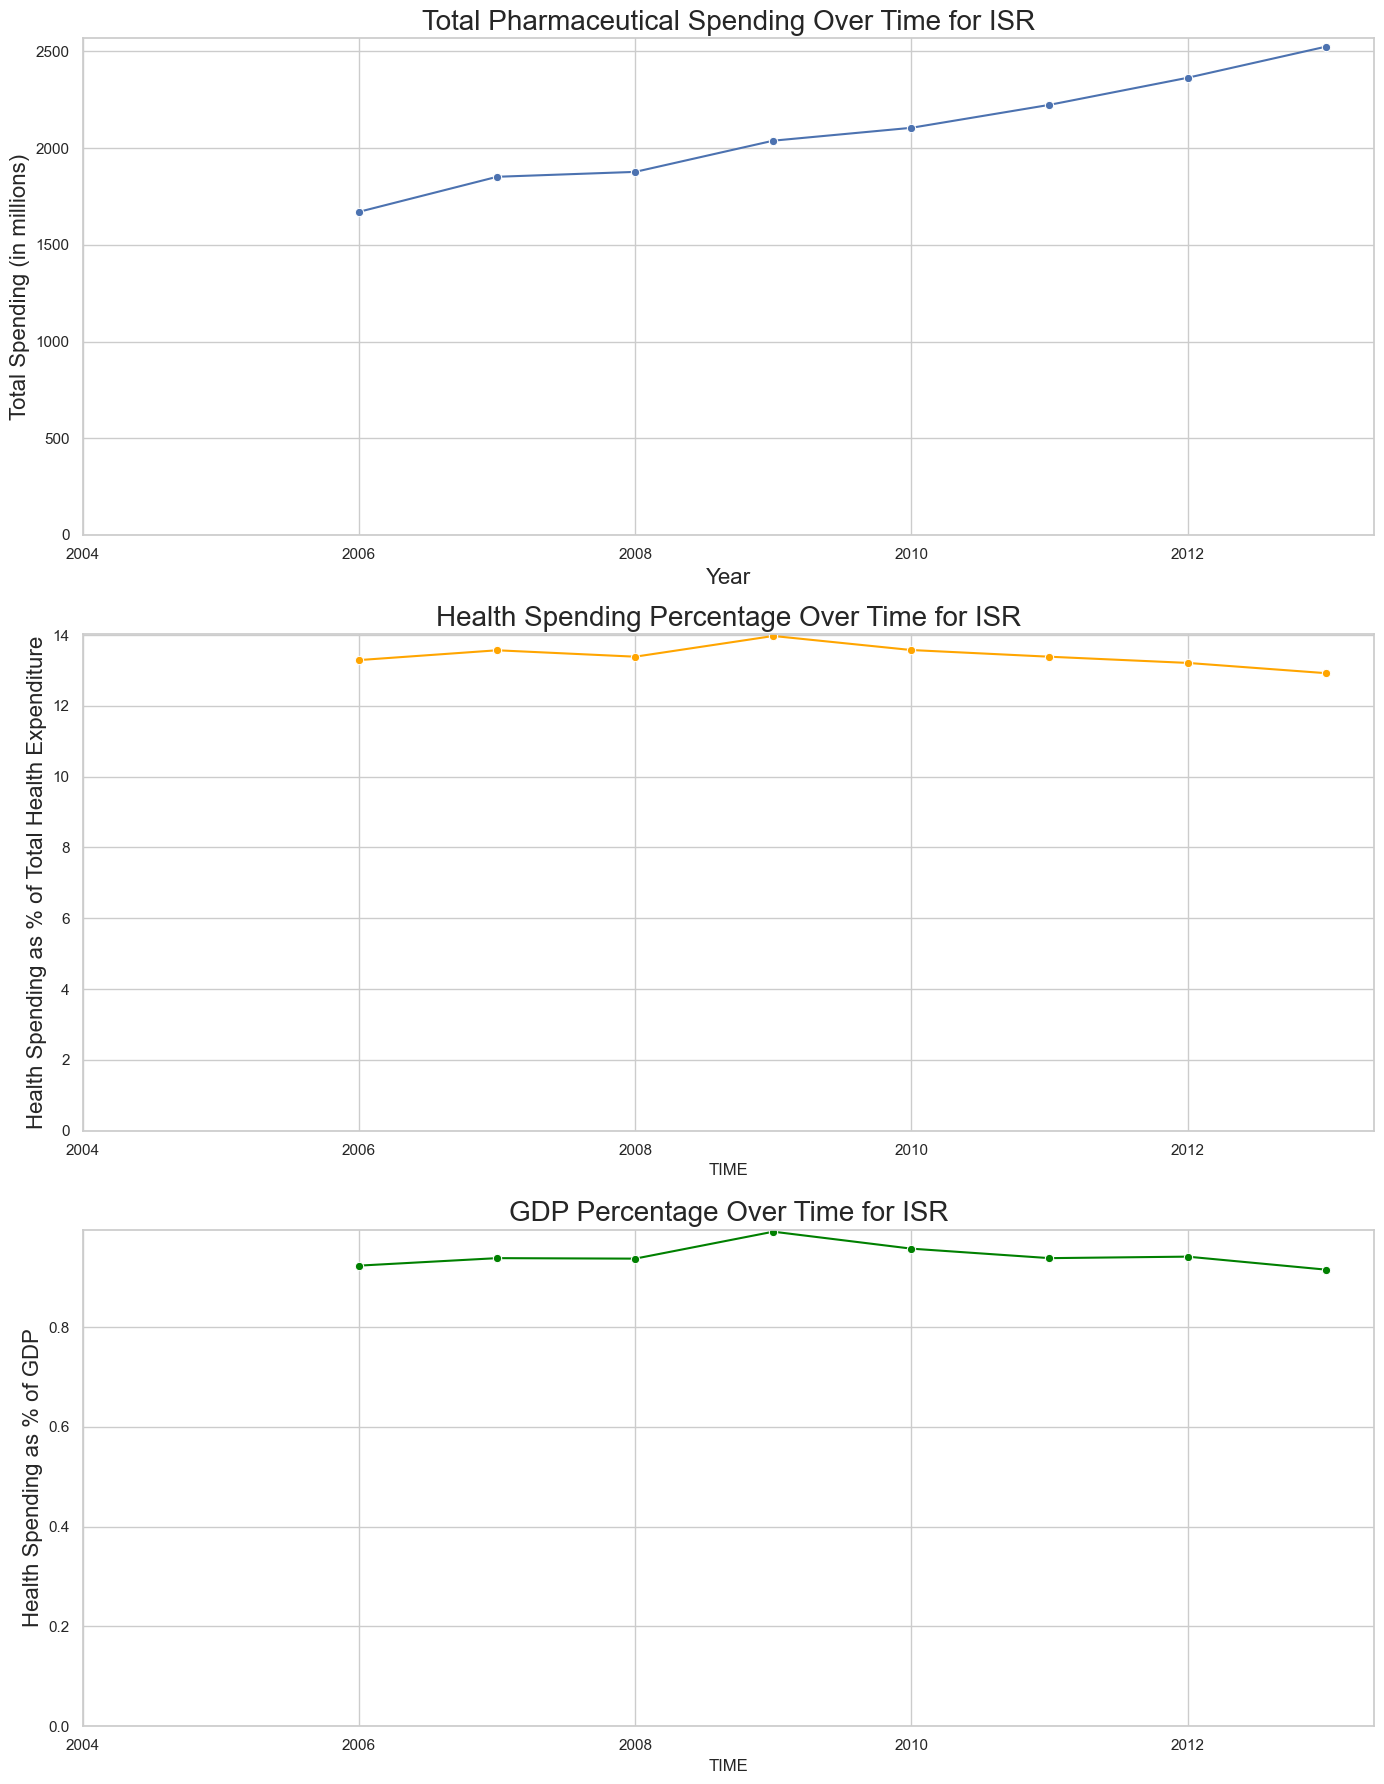

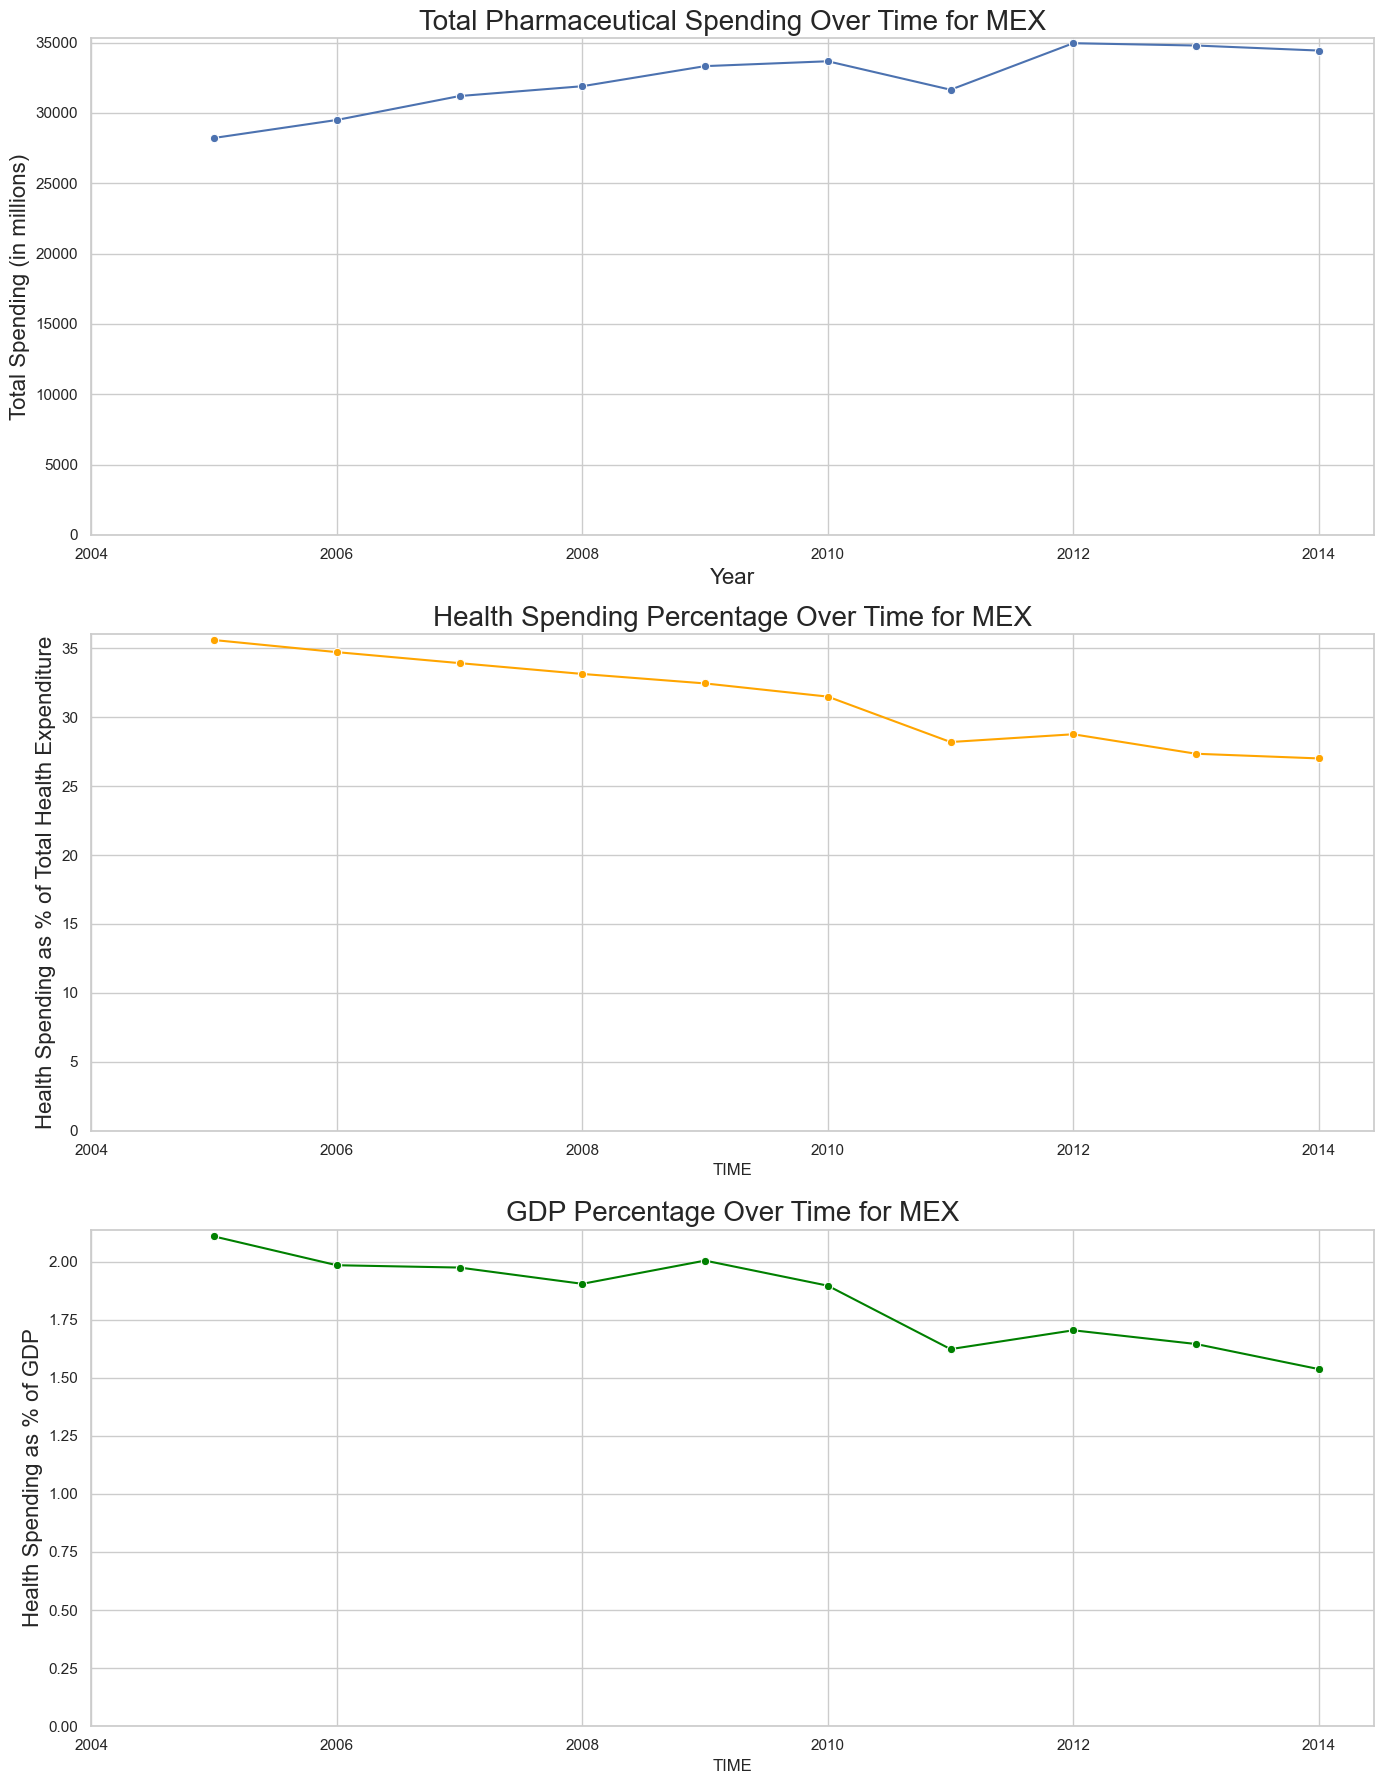

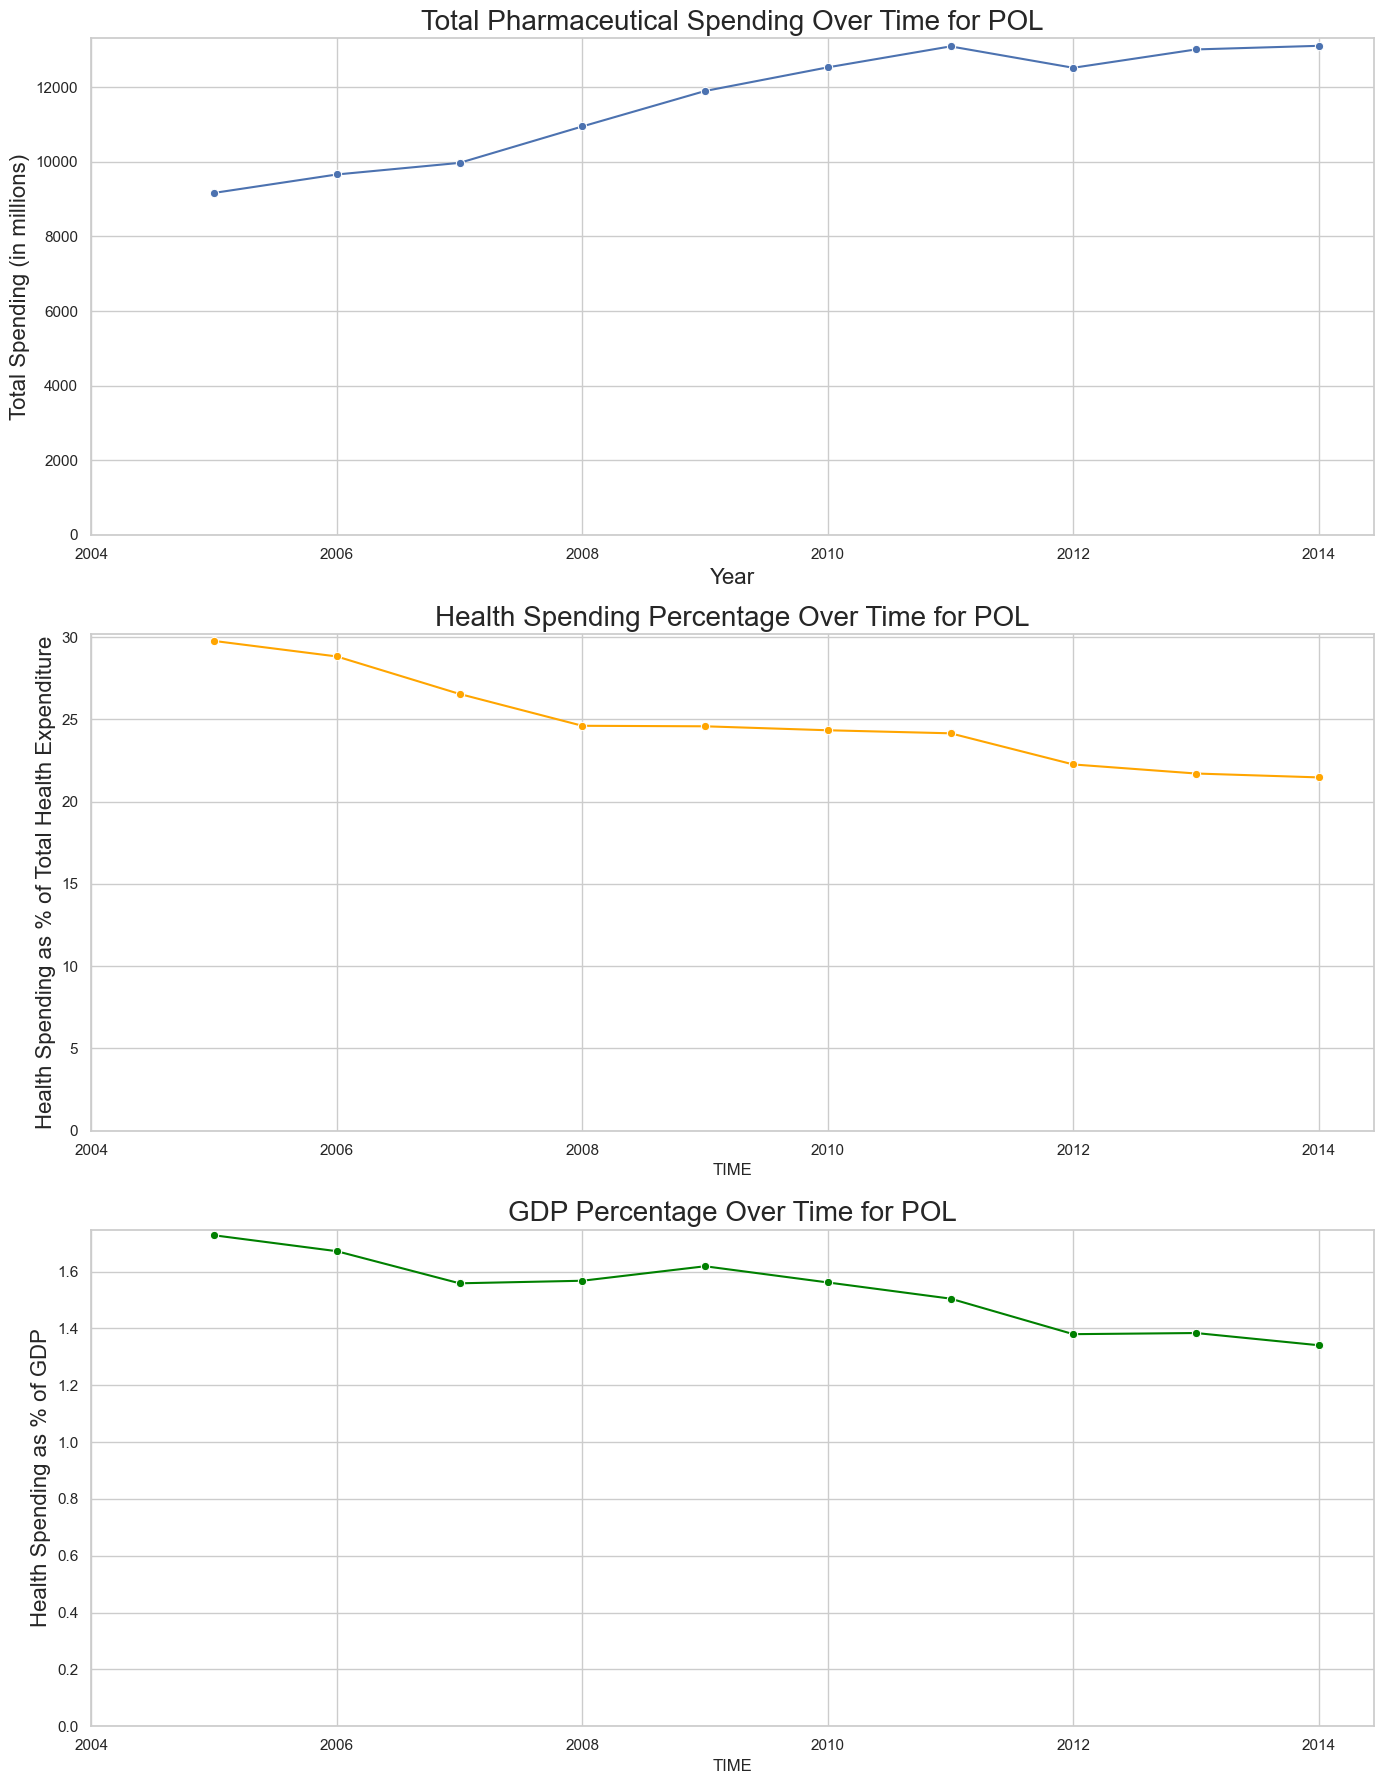

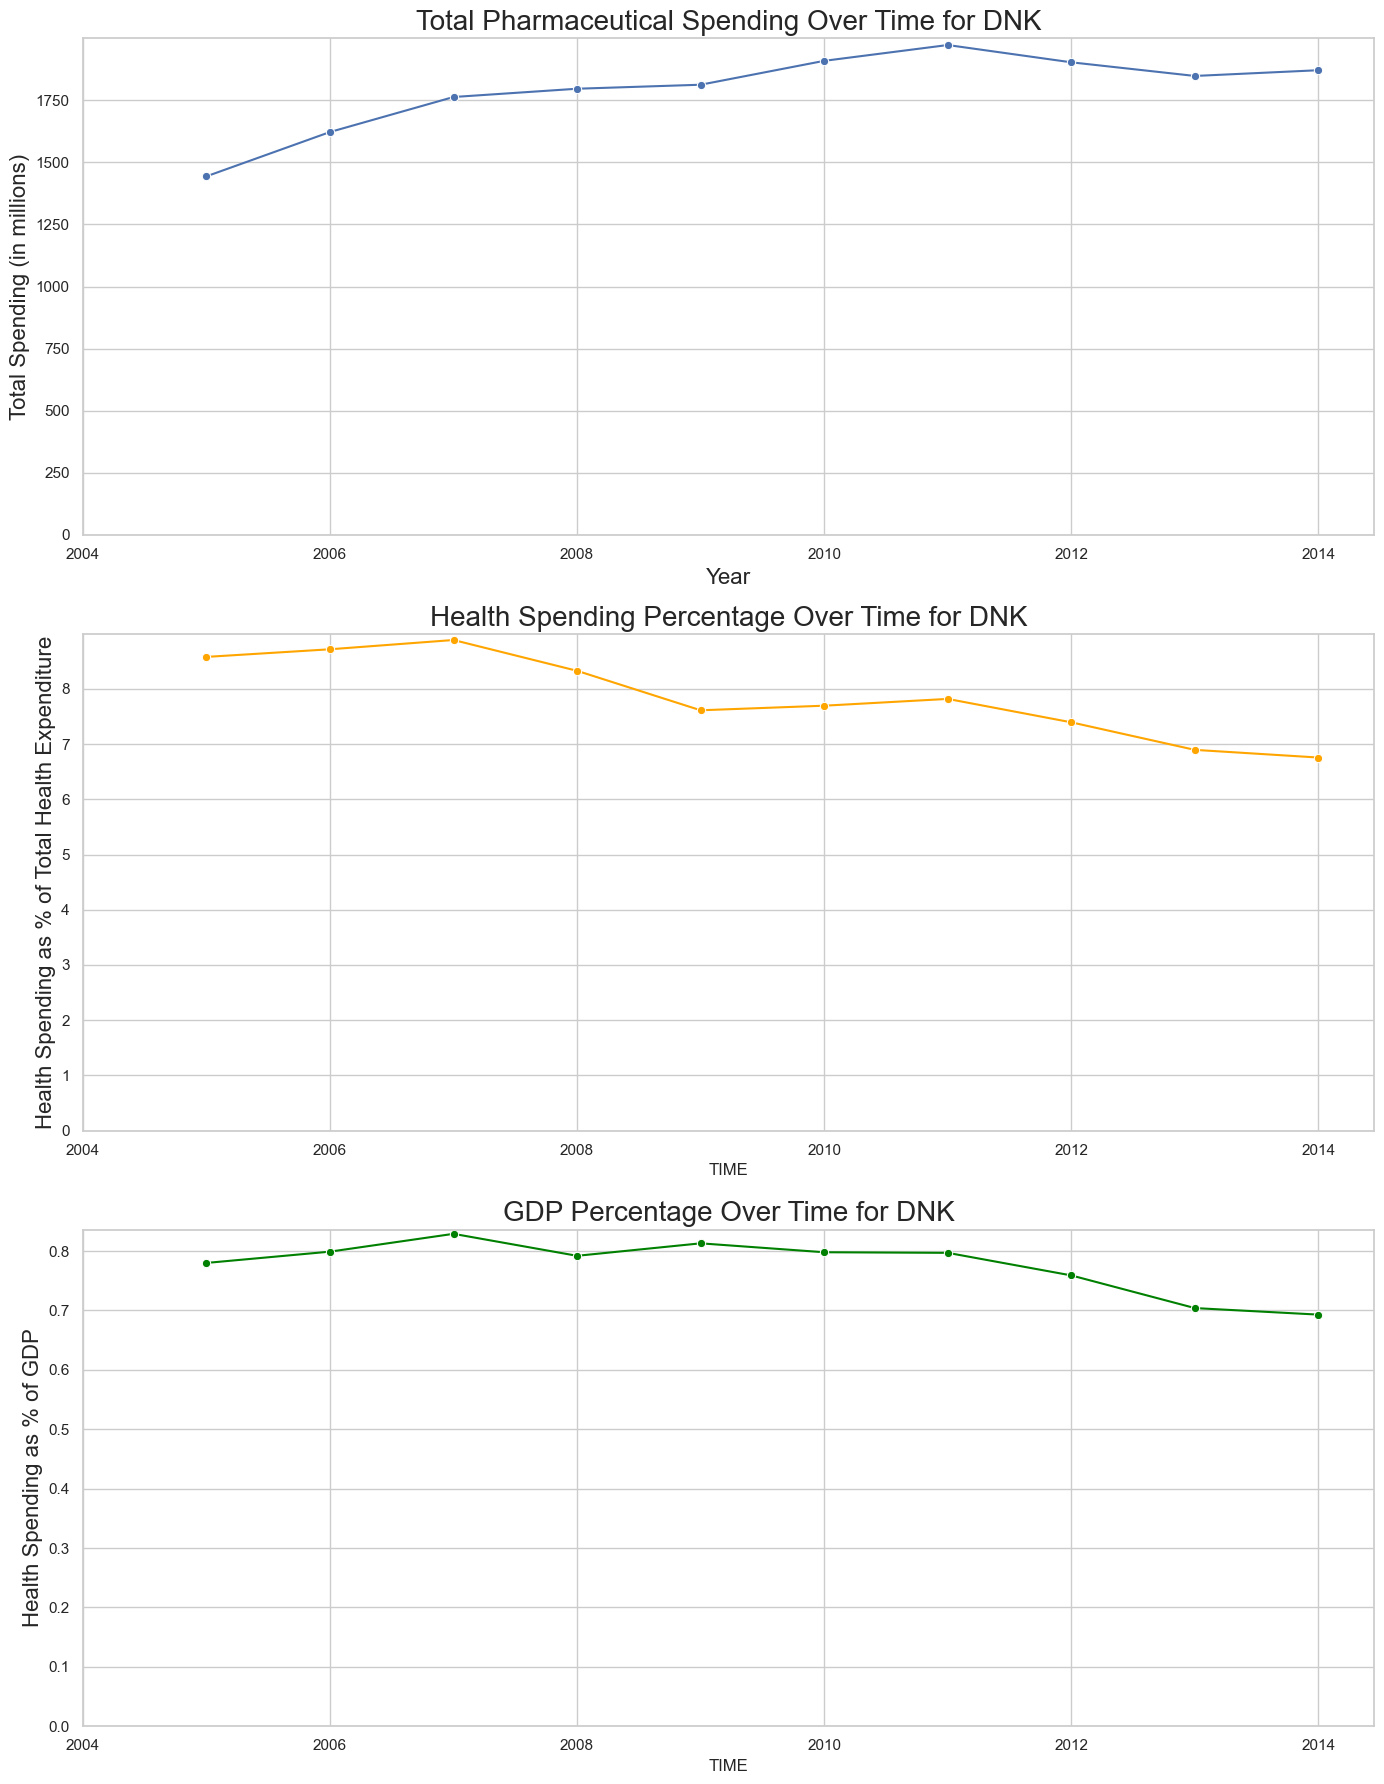

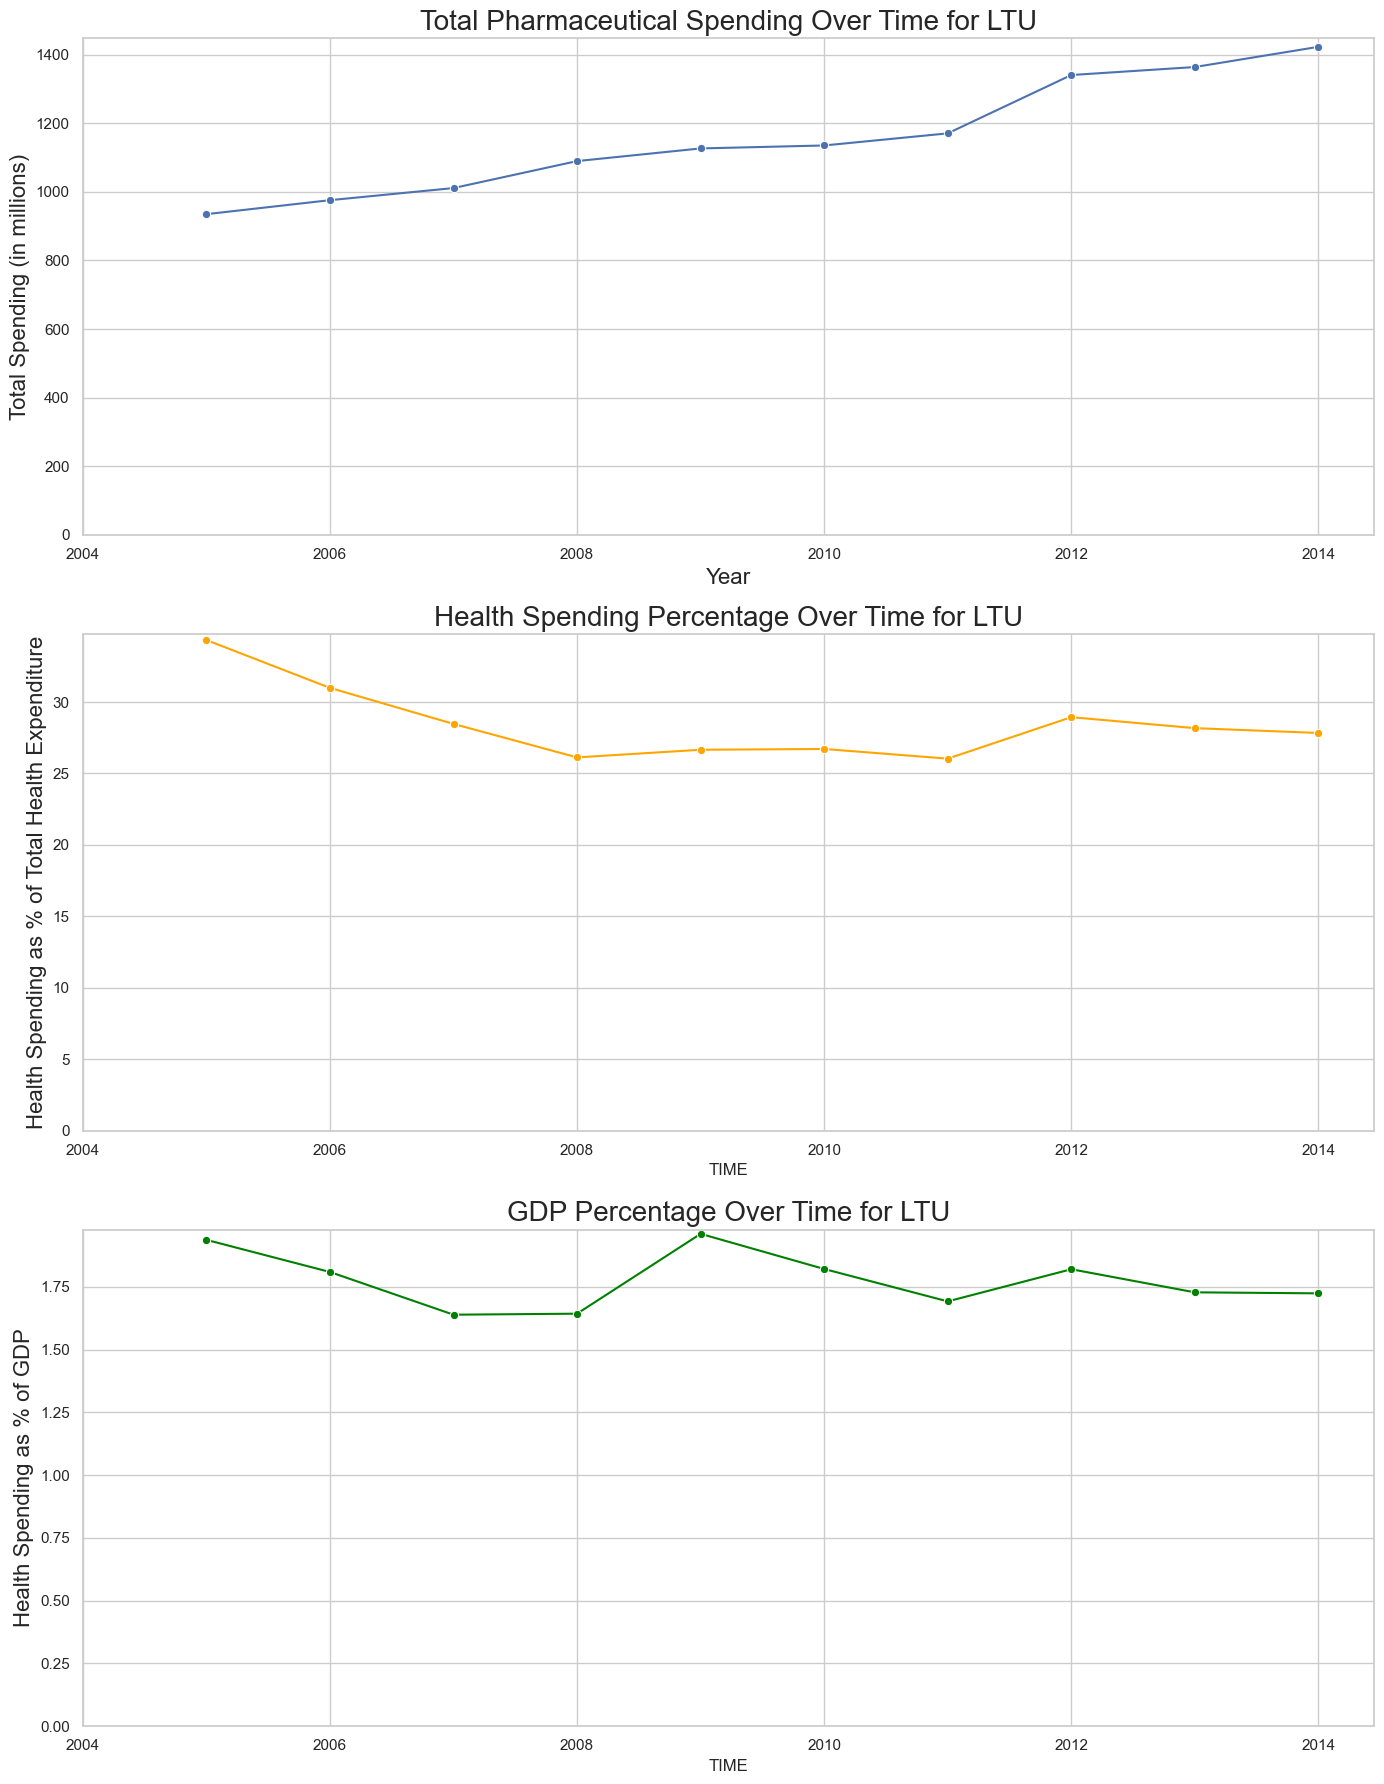

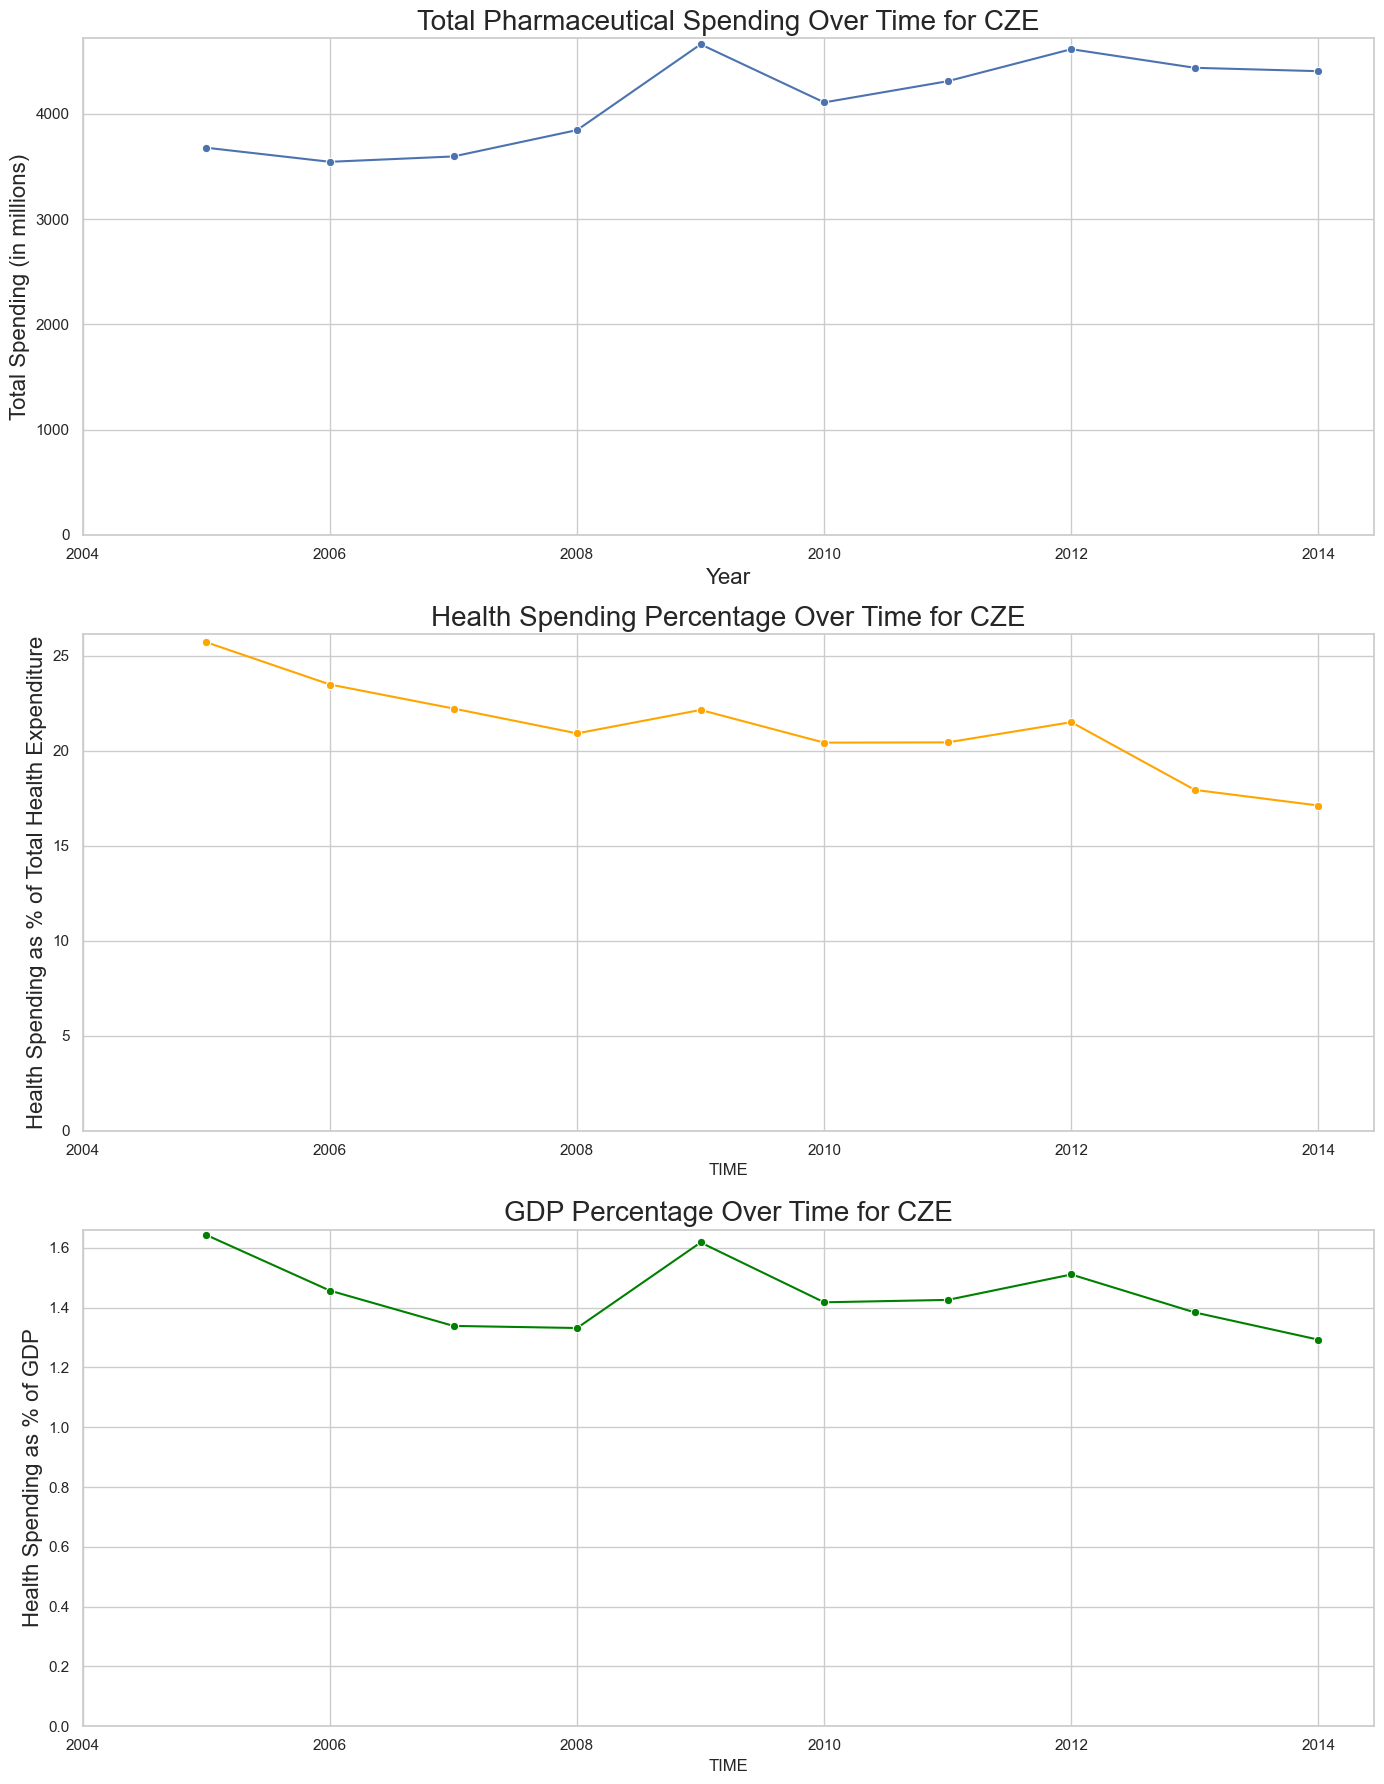

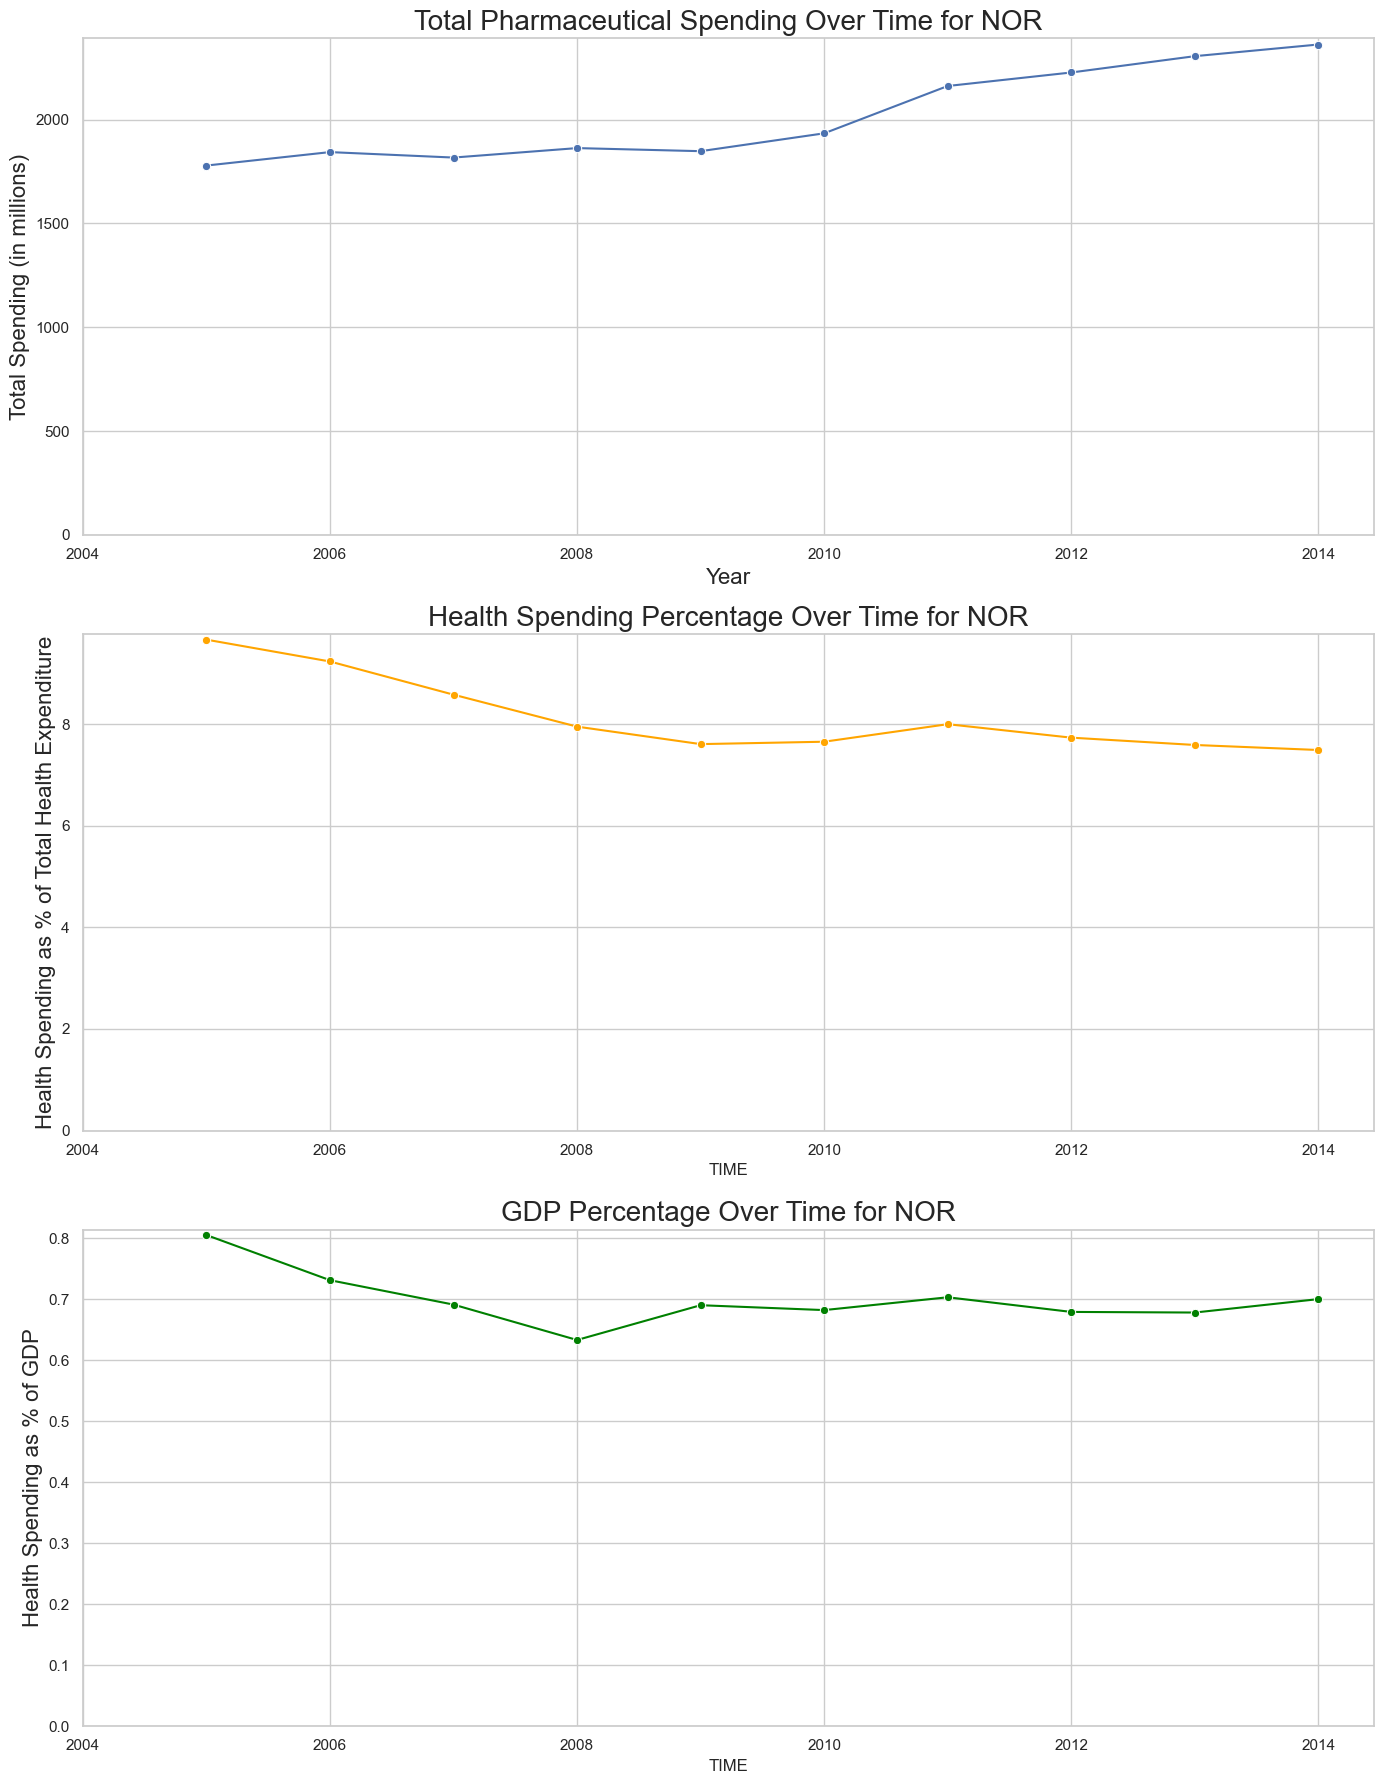

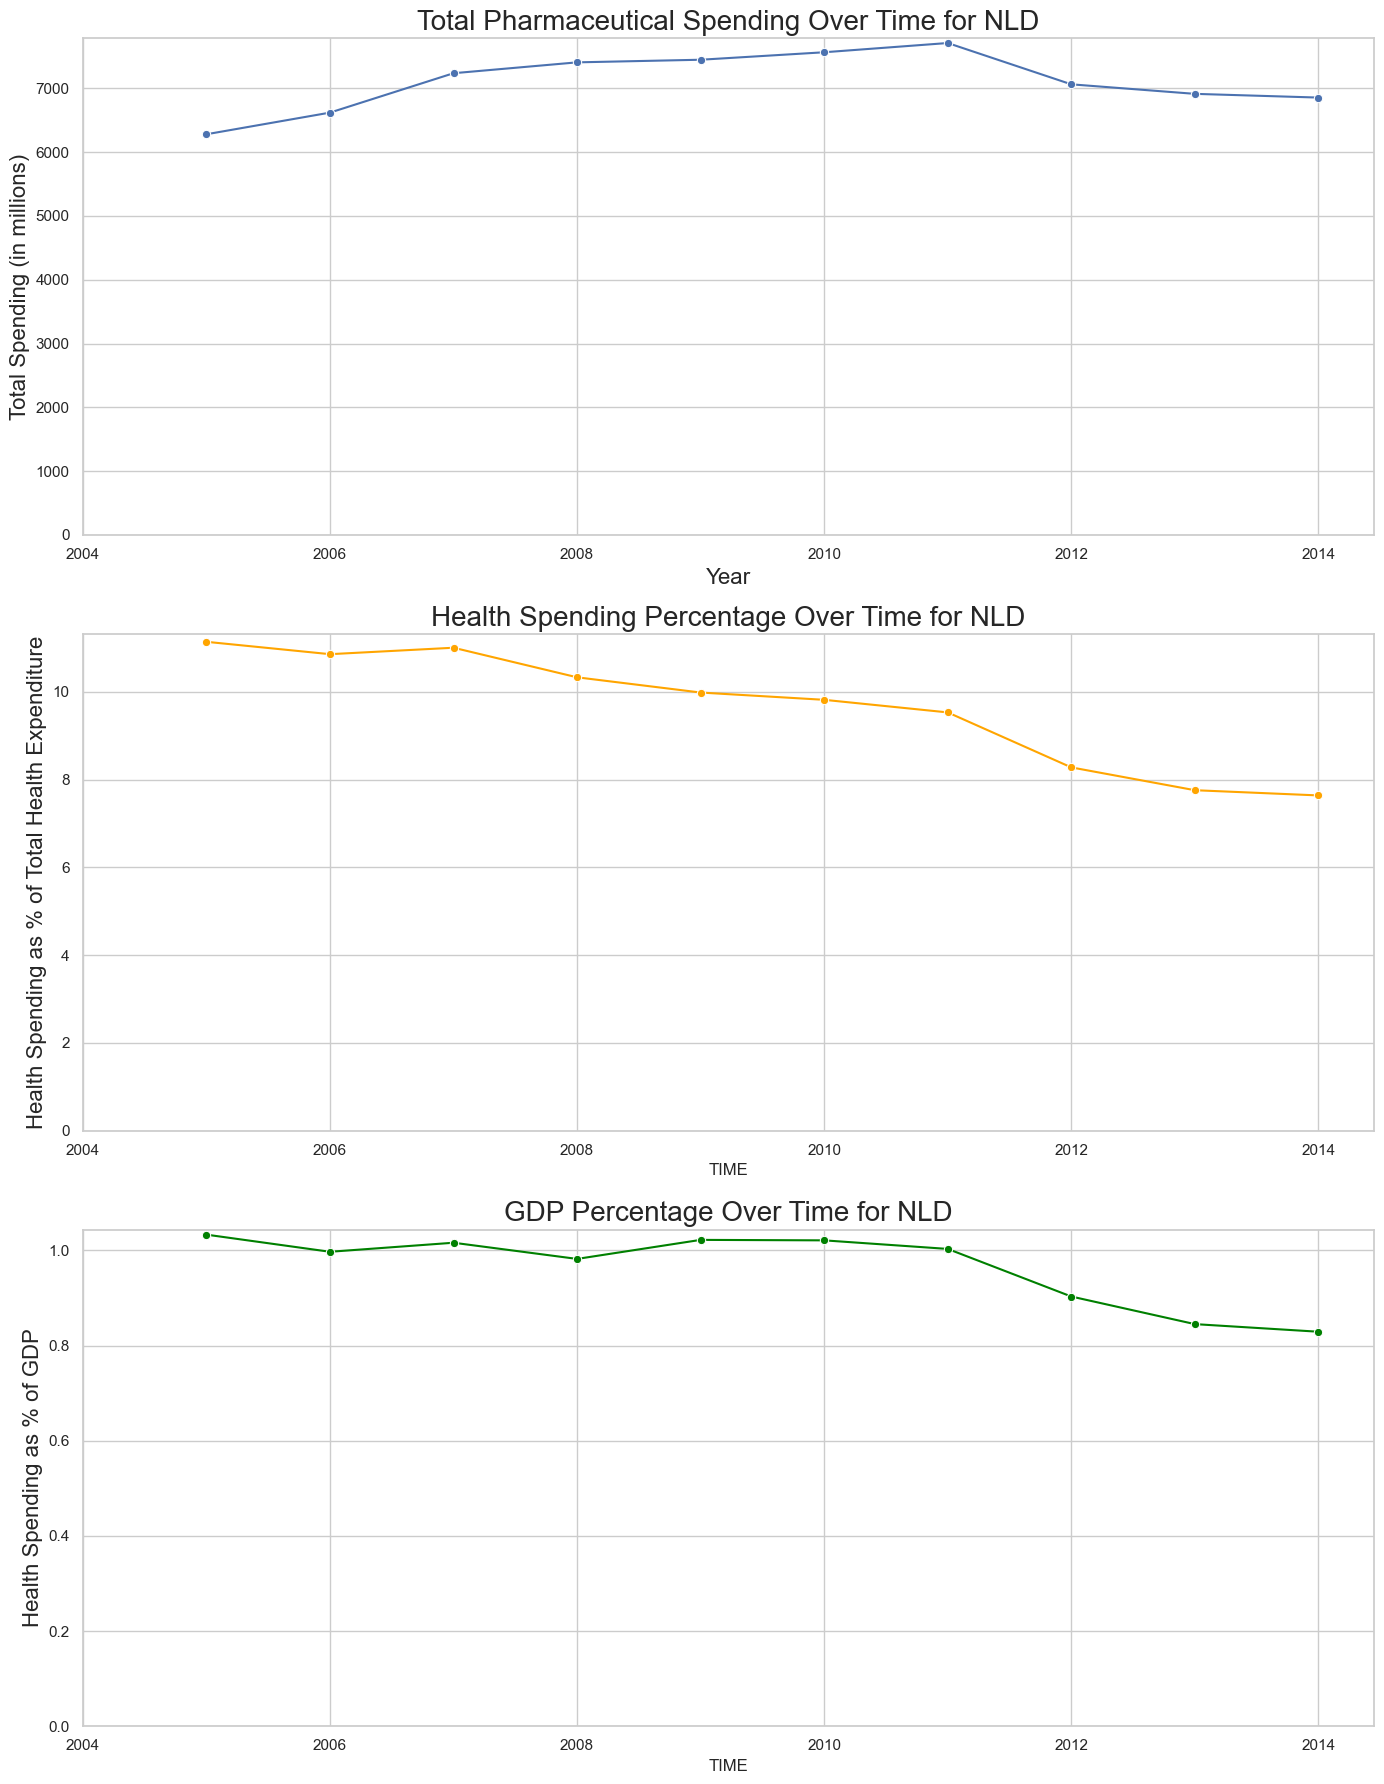

In [3]:
# Calculate the average USD_CAP per country
bottom_countries = (
    df_filtered.groupby('LOCATION')['USD_CAP'].mean()
    .sort_values(ascending=True)
    .head(10)
    .index
)

# Filter the DataFrame to include only the top 10 countries by USD_CAP
df_bottom_countries = df_filtered[df_filtered['LOCATION'].isin(bottom_countries)]

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define the x-axis limits
x_axis_start = 2004
y_axis_start = 0

# Loop through only the top 10 countries
for country in bottom_countries:
    country_data = df_bottom_countries[df_bottom_countries['LOCATION'] == country]
    
    plt.figure(figsize=(14, 18))
    
    # Plot Total Spending
    plt.subplot(3, 1, 1)
    sns.lineplot(data=country_data, x='TIME', y='TOTAL_SPEND', marker='o')
    plt.title(f'Total Pharmaceutical Spending Over Time for {country}', fontsize = 20)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel('Total Spending (in millions)', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot Health Expenditure Percentage
    plt.subplot(3, 1, 2)
    sns.lineplot(data=country_data, x='TIME', y='PC_HEALTHXP', marker='o', color='orange')
    plt.title(f'Health Spending Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of Total Health Expenditure', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot GDP Percentage
    plt.subplot(3, 1, 3)
    sns.lineplot(data=country_data, x='TIME', y='PC_GDP', marker='o', color='green')
    plt.title(f'GDP Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of GDP', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    plt.tight_layout()
    plt.show()
